## Problelm Statement
X Education sells online courses to professionals. Many visit their website daily but only a few become leads by filling out forms. The conversion rate is typically 30%. They want to boost this by identifying 'Hot Leads' to focus their efforts on.We need to build a model to assign a lead score to each lead. The goal is to prioritize leads with higher scores, as they are more likely to convert. The CEO aims for an 80% lead conversion rate.

We've received a leads dataset with about 9000 data points, containing various attributes like Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. The target variable is 'Converted', where 1 indicates conversion and 0 indicates non-conversion. We should investigate and handle the 'Select' level present in categorical variables, as it's akin to a null value.

#### Our goals for this case study are:

1. Develop a logistic regression model to assign lead scores ranging from 0 to 100, helping the company target potential leads. Higher scores indicate hotter leads with a higher likelihood of conversion, while lower scores signify colder leads less likely to convert.

2. Address additional problems presented by the company, ensuring the model can adapt to future changes in requirements. These issues will be documented based on the logistic regression model's findings and included in the final presentation for recommendations.

In [1]:
# Suppressing Warnings
import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import pandas, numpy, matplotlib and seaborn
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# import the lead data set
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0
# No duplicate values

True

In [5]:
# check the shape of the dataset
df.shape

(9240, 37)

The dataset has 9240 rows and 37 columns

In [6]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# check the type  of the columns of  dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# check the statistical asspect of the dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data cleaning

In the data set, few columns are containg the 'Select' Feature. First we convert the 'Select' Feature as Null Value

In [9]:
# replace the 'Select' feature by 'Nan'
df = df.replace('Select',np.nan)

In [10]:
# check the null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#percentage of the null values
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Here we see many columns has more than 70% null values. These columns are "How did you hear about X Education" and "Lead Profile". we will drop them

In [12]:
# drop the columns which have more than 70% null values
df = df.drop(["How did you hear about X Education","Lead Profile"],axis =1)

In [13]:
# drop the unneccesary columns (Prospect Id and lead number columns are the id numbers. It has no Mathemaical Value.)
df = df.drop(['Prospect ID', 'Lead Number'],axis =1)

In [14]:
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

#### Now we will take care of null values in each column one by one

In [15]:
# List of categorical columns
categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                       'What is your current occupation',
                       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
                       'City', 'Asymmetrique Activity Index',
                       'Asymmetrique Profile Index', 'Last Notable Activity']

# Loop through each categorical column and print its value counts
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for Lead Origin:
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Value counts for Lead Source:
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Value counts for Last Activity:
Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973

In [16]:
# Here we see most of the values are belongs to Country India. So we replace the null values by 'India'
df['Country'] = df['Country'].replace(np.nan, 'India')

In [17]:
# If a lead hasn't selected any specialization due to unavailability in the options,
# absence of any specialization, or being a student,
# we can categorize such cases under "Unspecified" for missing values.

df['Specialization'] = df['Specialization'].replace(np.nan, 'Unspecified')

In [18]:
# What is your current occupation 
# most of the vlaues are in the "Unempployed" feature so we replace the null values by it
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [19]:
# What matters most to you in choosing a course 
# most of the values is in the 'Better career prospect' feature so we replace the null values by it
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [20]:
#Tags
# most of the values is in the 'Will revert after reading the email' feature so we replac the null values by it
df['Tags'] = df['Tags'].replace(np.nan,'Will revert after reading the email')

In [21]:
# Lead Quality: 
# The majority of values belong to the "might be" feature. When replacing null values, it seems reasonable to assume that most people 
#select it based on intuition. Therefore, we can treat null values as equivalent to the 'not sure' feature.
df['Lead Quality'] = df['Lead Quality'].replace(np.nan,'Not Sure')

In [22]:
# city
# most of the city belongs to mumbai so we simply replace the null values by it
df['City'] = df['City'].replace(np.nan,'Mumbai')

In [23]:
#Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].replace(np.nan.'Medium')
# most of the city belongs to Medium so we simply replace the null values by it
df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].replace(np.nan,'Medium')

In [24]:
#Asymmetrique Profile Index
# most of the city belongs to Medium so we simply replace the null values by it
df['Asymmetrique Profile Index'] =df['Asymmetrique Profile Index'].replace(np.nan,'Medium')

In [25]:
# percentage of the null values
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

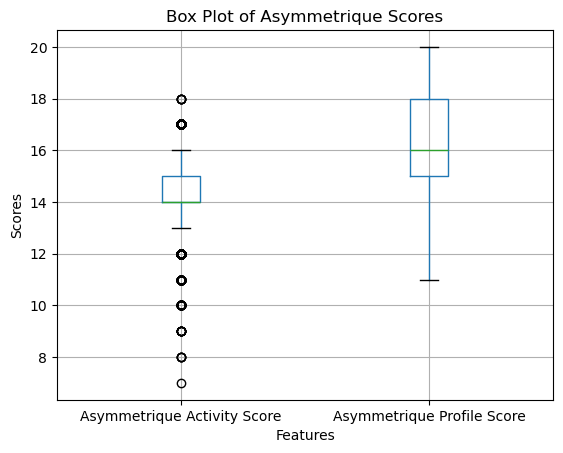

In [26]:

# Filter the columns of interest
columns_of_interest = ['Asymmetrique Activity Score', 'Asymmetrique Profile Score']

# Create a box plot
df[columns_of_interest].boxplot()

# Add title and labels
plt.title('Box Plot of Asymmetrique Scores')
plt.xlabel('Features')
plt.ylabel('Scores')

# Show the plot
plt.show()


Here we see that there are so  outliers in the column of Asymetrique Acticity Score.
so we drop These columns. we also drop the Asymetrique Acticity Index columns because index columns are dependend on the score column

In [27]:
# drop the columns Asymetrique Acticity Score & Asymetrique Acticity Index
df.drop(columns=['Asymmetrique Activity Score', 'Asymmetrique Activity Index'], inplace=True)

In [28]:
# fill the null values by the median
# Calculate the median of the 'Asymmetrique Profile Score' column
median_profile_score = df['Asymmetrique Profile Score'].median()

# Fill null values with the median
df['Asymmetrique Profile Score'].fillna(median_profile_score, inplace=True)


In [29]:
# the columns which have very low missing vales for that we can drop the rows
df.dropna(inplace = True)

In [30]:
# percentage of the null values
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

Now There is no more missing values

### Univariate Data Analysis

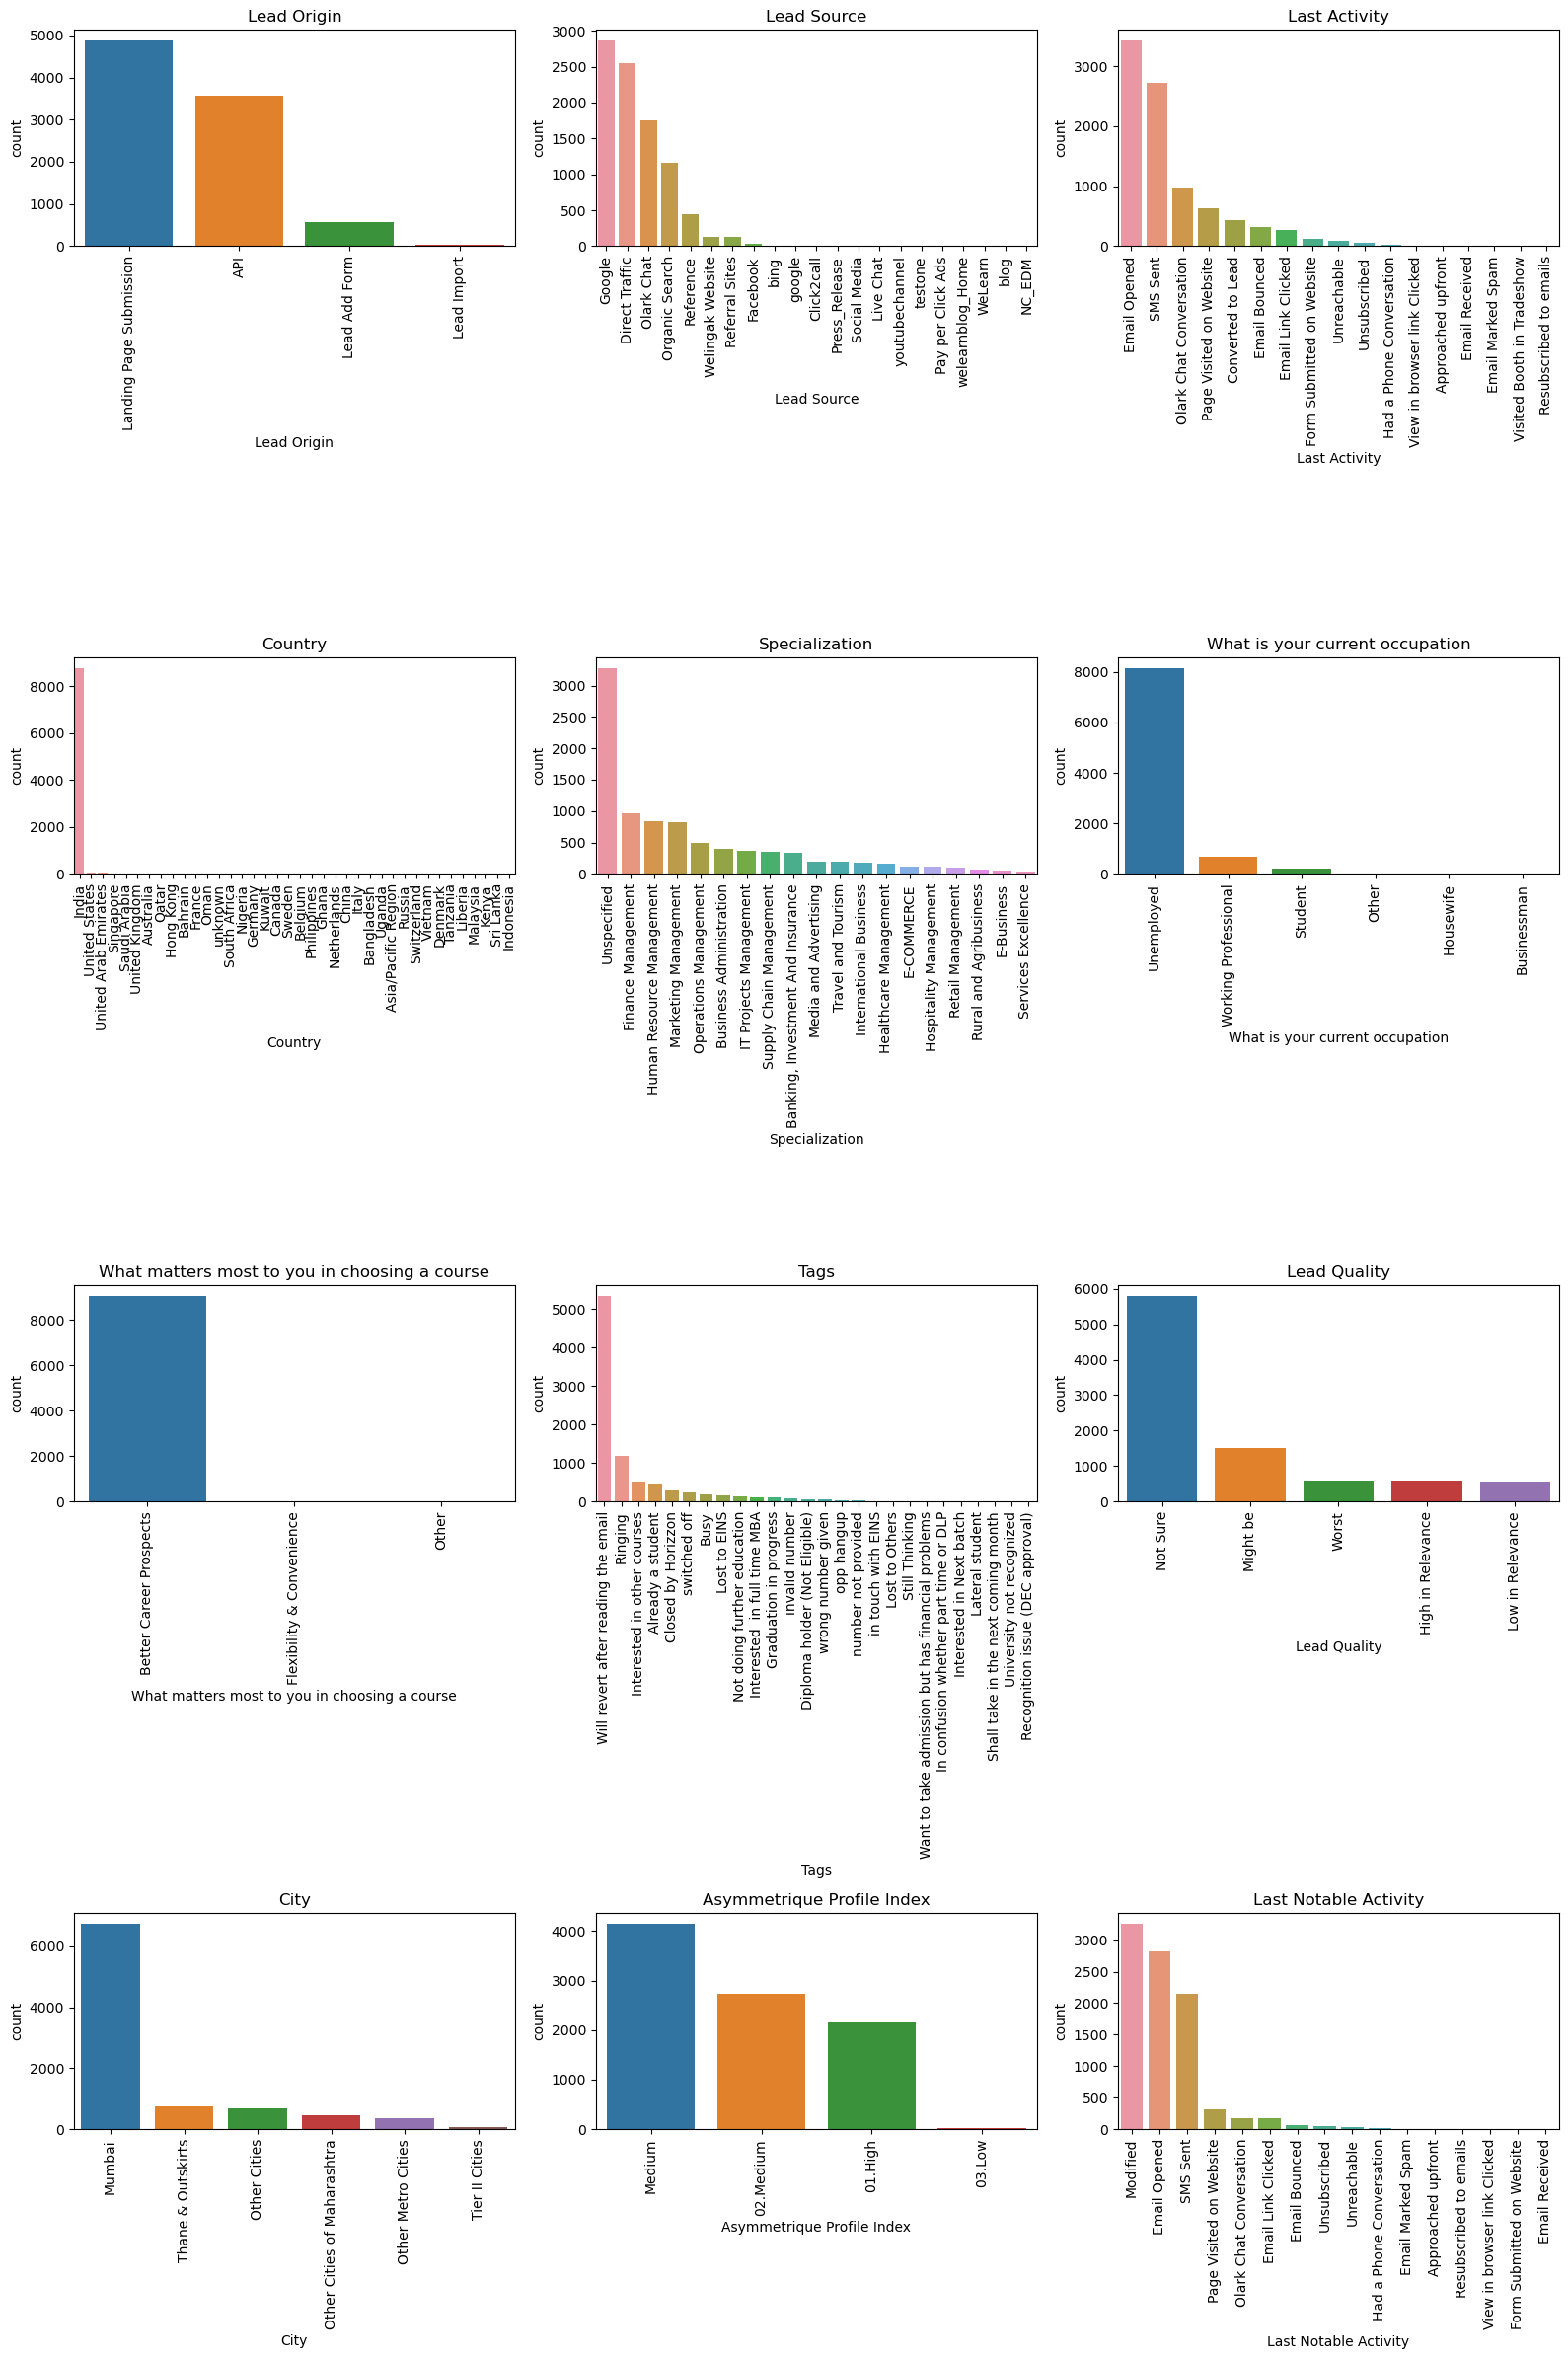

In [31]:

# List of categorical columns
categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                       'What is your current occupation',
                       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
                       'City',
                       'Asymmetrique Profile Index', 'Last Notable Activity']

# Set up the subplot grid
num_plots = len(categorical_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots - 1) // num_cols + 1  # Number of rows needed

# Create the plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6* num_rows))  # Adjusted figsize

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical column, calculate value counts, sort them, and then create a countplot
for i, col in enumerate(categorical_columns):
    value_counts = df[col].value_counts().sort_values(ascending=False)  # Calculate value counts and sort
    sns.countplot(x=col, data=df, order=value_counts.index, ax=axes[i])  # Plot with sorted order
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Rotate x-axis labels for better visibility

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
# Value Counts For those columns, which contains the YES and NO Features

# List of columns
columns_to_count = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
                    'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                    'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                    'Get updates on DM Content', 'I agree to pay the amount through cheque',
                    'A free copy of Mastering The Interview']

# Loop through each column and print its value counts
for col in columns_to_count:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()


Value counts for Do Not Email:
Do Not Email
No     8358
Yes     716
Name: count, dtype: int64

Value counts for Do Not Call:
Do Not Call
No     9072
Yes       2
Name: count, dtype: int64

Value counts for Search:
Search
No     9060
Yes      14
Name: count, dtype: int64

Value counts for Magazine:
Magazine
No    9074
Name: count, dtype: int64

Value counts for Newspaper Article:
Newspaper Article
No     9072
Yes       2
Name: count, dtype: int64

Value counts for X Education Forums:
X Education Forums
No     9073
Yes       1
Name: count, dtype: int64

Value counts for Newspaper:
Newspaper
No     9073
Yes       1
Name: count, dtype: int64

Value counts for Digital Advertisement:
Digital Advertisement
No     9070
Yes       4
Name: count, dtype: int64

Value counts for Through Recommendations:
Through Recommendations
No     9067
Yes       7
Name: count, dtype: int64

Value counts for Receive More Updates About Our Courses:
Receive More Updates About Our Courses
No    9074
Name: count, dtyp

Based on the analysis, we've observed that several columns have a notably higher count of 'NO' values relative to 'YES' values. Consequently, we plan to eliminate those columns. However, despite the prevalence of 'NO' values in the "Do Not Call" column, we'll preserve it. This column is deemed significant as it relates to the frequency of phone calls and may hold importance for the target variable.

In [33]:
# Drop the Columns
columns_to_drop = [
    'Search', 'Magazine', 'Newspaper Article', 
    'X Education Forums', 'Newspaper', 
    'Digital Advertisement', 'Through Recommendations',
    'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content',
    'Get updates on DM Content',
    'I agree to pay the amount through cheque',
    'A free copy of Mastering The Interview'
]

df = df.drop(columns=columns_to_drop)


In [34]:
# checking the outliers of the numeric column
columns_for_describe = [ 'TotalVisits', 'Total Time Spent on Website',
                       'Page Views Per Visit', 'Asymmetrique Profile Score']
df[columns_for_describe] = df[columns_for_describe].apply(pd.to_numeric, errors='coerce') # convert data type to object to numeric value

df[columns_for_describe].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Profile Score
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151,16.182940
std,4.858802,545.256560,2.160871,1.339706
min,0.000000,0.000000,0.000000,11.000000
5%,0.000000,0.000000,0.000000,15.000000
25%,1.000000,11.000000,1.000000,16.000000
50%,3.000000,246.000000,2.000000,16.000000
75%,5.000000,922.750000,3.200000,16.000000
90%,7.000000,1373.000000,5.000000,18.000000
95%,10.000000,1557.000000,6.000000,19.000000


From the above table we can see that there is some outliers in 'Total Visit', 'Page views per Visit', and 'Asymmetrique Profile Score'. But there is no Outliers in 'Total Time Spent on Website. Now we confirm this on the boxplot graph

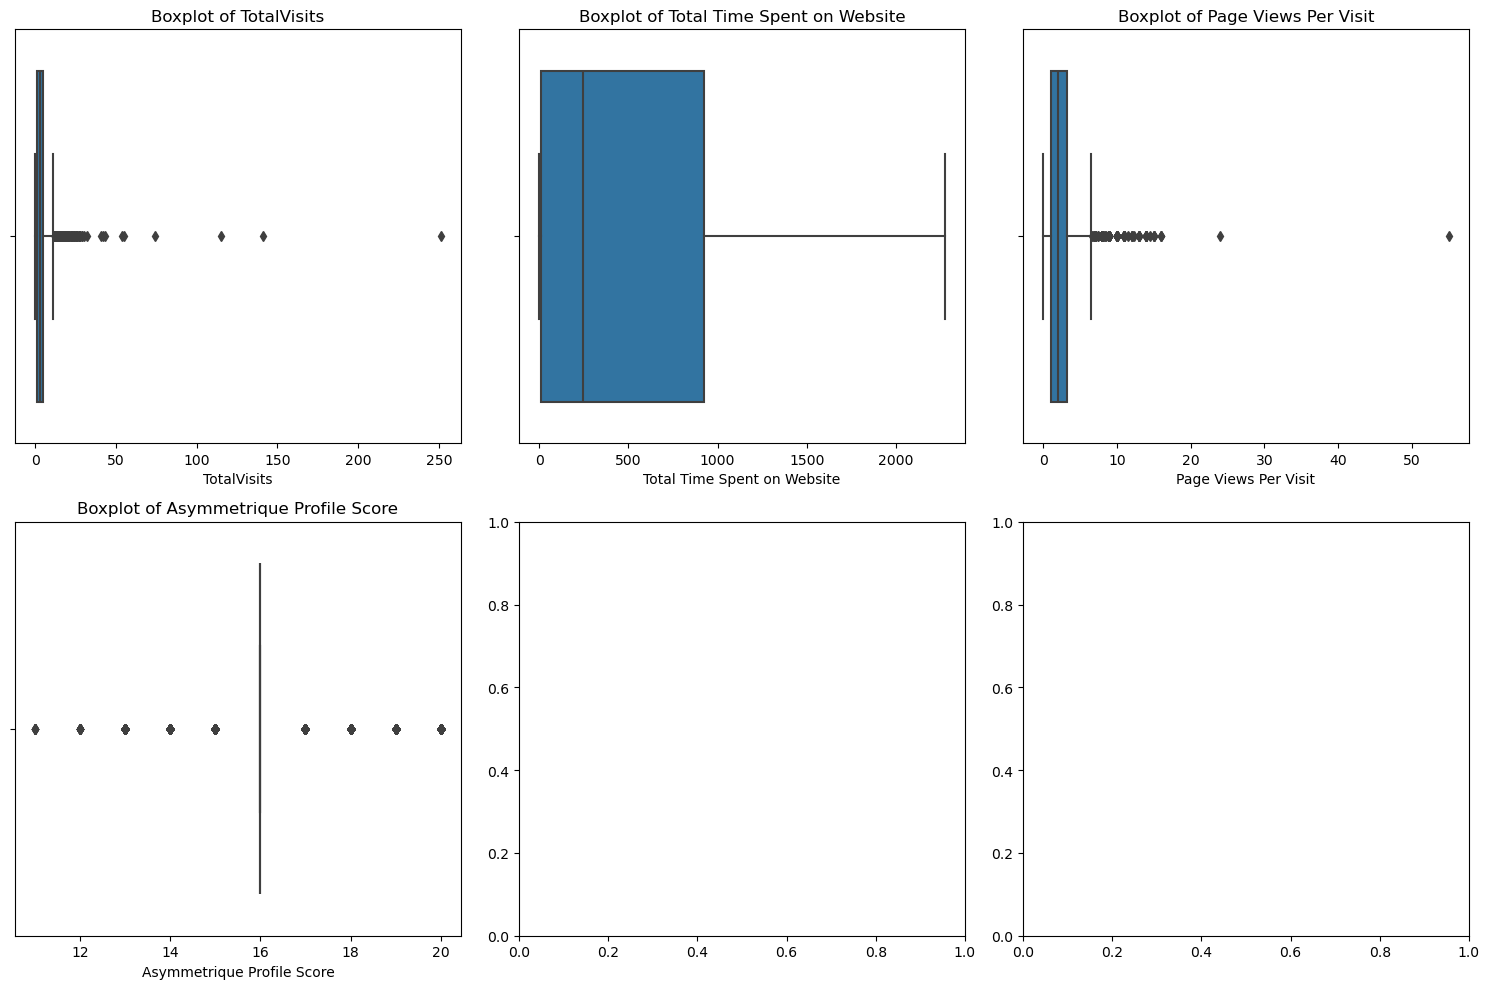

In [35]:
# List of columns for boxplot
columns_for_describe = [ 'TotalVisits', 'Total Time Spent on Website',
                       'Page Views Per Visit','Asymmetrique Profile Score']

# Set up the subplot grid
num_plots = len(columns_for_describe)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots - 1) // num_cols + 1  # Number of rows needed

# Create the plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(columns_for_describe):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Here we can see from the graph that there are some of outliers present in the columns. Now we create the box plot in the cap of 95%

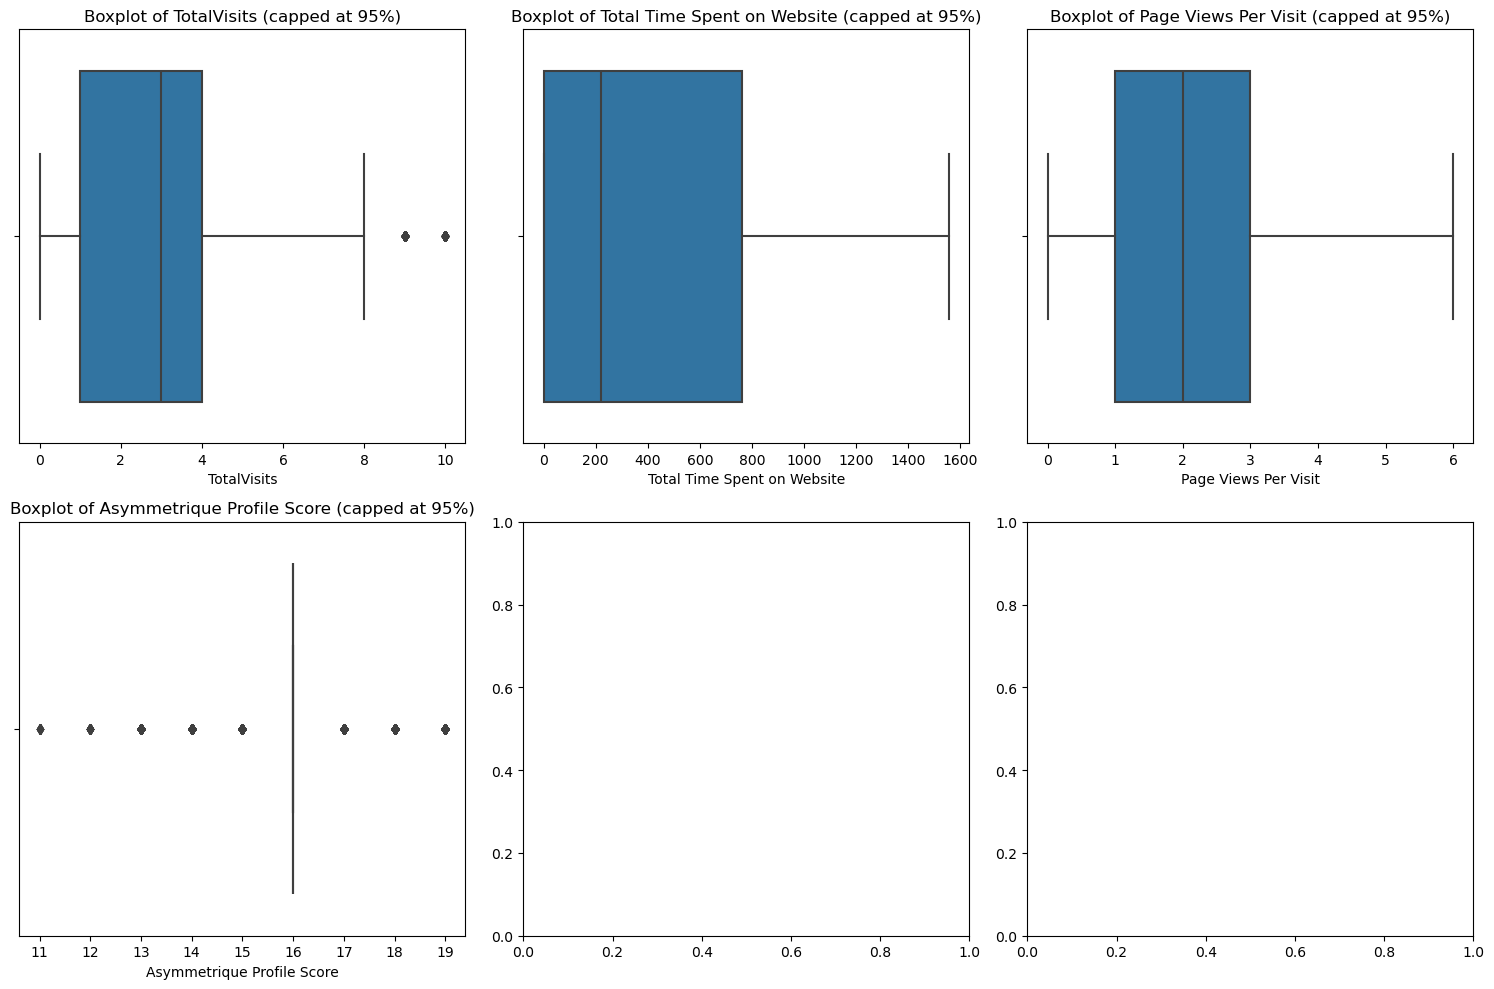

In [36]:
# List of columns for boxplot
columns_for_boxplot = ['TotalVisits', 'Total Time Spent on Website',
                       'Page Views Per Visit', 'Asymmetrique Profile Score']

# Calculate the 95th percentile for each column
percentile_95 = df[columns_for_boxplot].quantile(0.95)

# Filter the data to include only values up to the 95th percentile
df_capped = df[columns_for_boxplot].apply(lambda x: x[x <= percentile_95[x.name]])

# Set up the subplot grid
num_plots = len(columns_for_boxplot)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots - 1) // num_cols + 1  # Number of rows needed

# Create the plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(columns_for_boxplot):
    sns.boxplot(x=df_capped[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} (capped at 95%)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Here we see that after plot the boxplot in the cap of 95% . We Observed that Asymmetrique Profile Score has Outliers after Ploting the graph in between  5% to 95 % cap. Also We drop the Asymmetrique Profile Index because index column and the score column are co related

In [37]:
df.drop(columns=['Asymmetrique Profile Score', 'Asymmetrique Profile Index'], inplace=True)

### Multivariate Analysis

Our Target column is 'Convert' column. Now we see the graphs between the Target columns and the Catogical Columns.

In [38]:
# Before that we see our data set columns after celaning the dataset
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'City', 'Last Notable Activity'],
      dtype='object')

In [39]:
df['Converted'] = df['Converted'].astype(str)  # change the datatype to string for create the graph

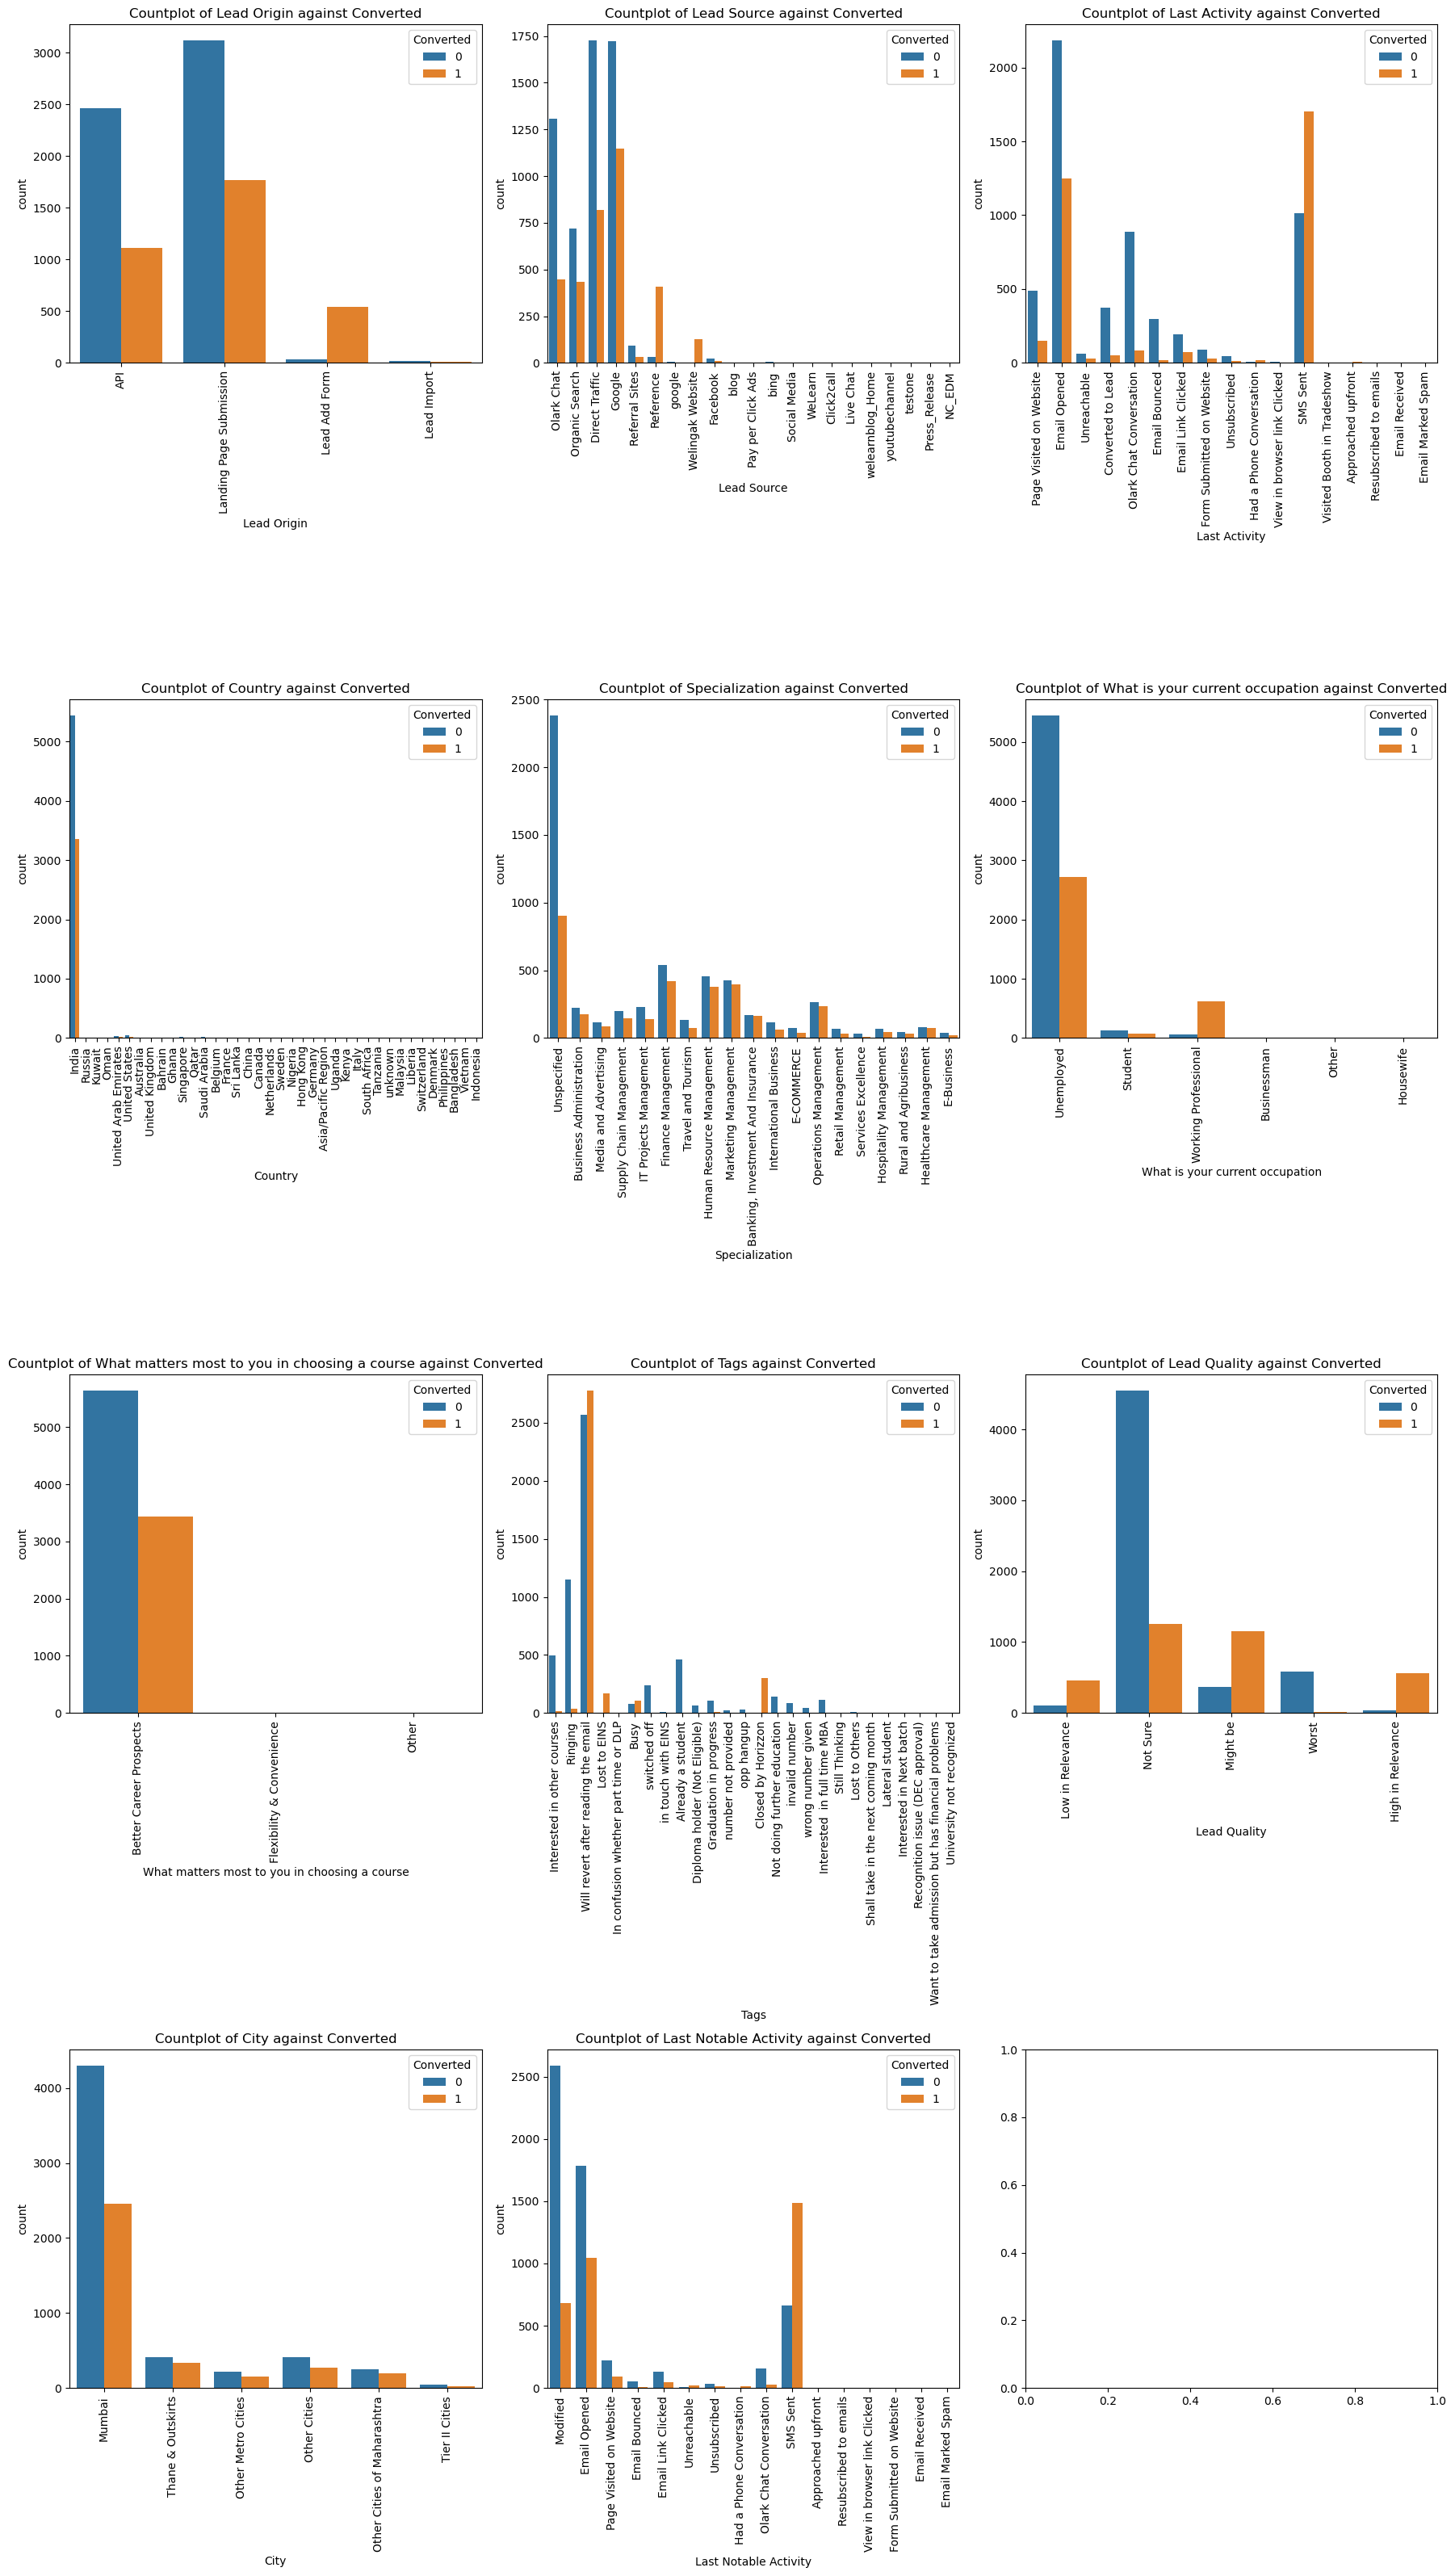

In [40]:
# List of categorical columns
categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                       'What is your current occupation', 'What matters most to you in choosing a course',
                       'Tags', 'Lead Quality', 'City', 'Last Notable Activity']

# Set up the subplot grid
num_plots = len(categorical_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots - 1) // num_cols + 1  # Number of rows needed

# Create the plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical column and create a countplot against 'Converted'
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Converted', data=df, ax=axes[i])
    axes[i].set_title(f'Countplot of {col} against Converted')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Rotate x-axis labels for better visibility

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


From the above graphe we clearly see that the column 'County' and the Column 'What Matters most to you in chossing the course' has no impact on the target Variable. Because the 'Country' column is contain mostly 'India' Features and 'what matters most to you in choosing the course' is coaintain the 'Better Career prospect' feature mostly. So simply we drop this two columns

In [41]:
drop_columns = ['Country','What matters most to you in choosing a course']
df = df.drop(columns = drop_columns)

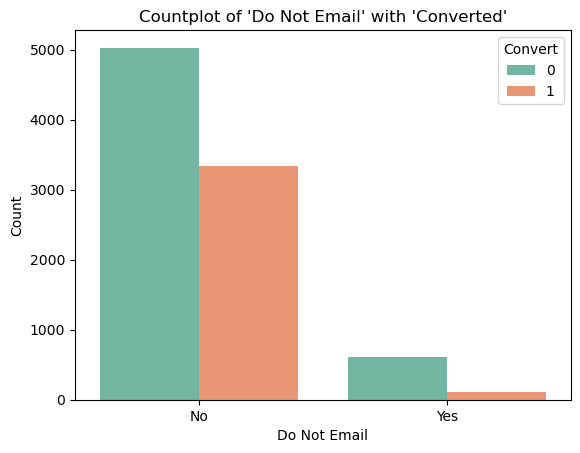

In [42]:
# Plotting the countplot
sns.countplot(x="Do Not Email", hue="Converted", data=df, palette="Set2")
# Adding title and labels
plt.title("Countplot of 'Do Not Email' with 'Converted'")
plt.xlabel("Do Not Email")
plt.ylabel("Count")
plt.legend(title="Convert")

# Display the plot
plt.show()


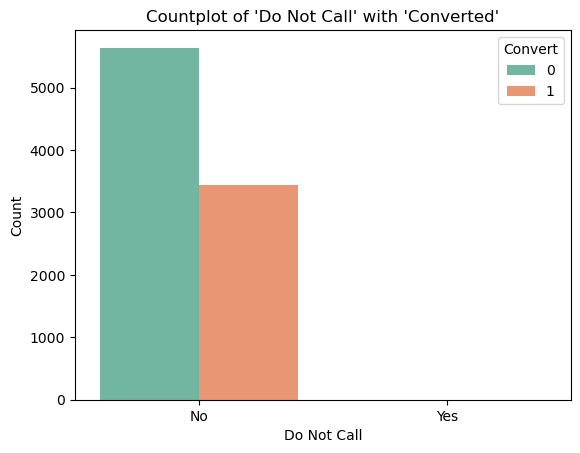

In [43]:
# Plotting the countplot
sns.countplot(x="Do Not Call", hue="Converted", data=df, palette="Set2")
# Adding title and labels
plt.title("Countplot of 'Do Not Call' with 'Converted'")
plt.xlabel("Do Not Call")
plt.ylabel("Count")
plt.legend(title="Convert")

# Display the plot
plt.show()

The analysis of the two graphs indicates that the "Do Not Email" column significantly influences the target variable. Instances with a "No" designation have a higher conversion rate, while non-conversion instances are also prevalent within the "No" category. Conversely, the "Do Not Call" column shows minimal impact on the target variable.All  Instances are in the "NO" designation. So We drop this column

In [44]:
df.drop(columns=["Do Not Call"], inplace=True)

#### lets create the graph against the numerical column

In [45]:
df['Converted'] = df['Converted'].astype('int')  # change the datatype to string for create the graph

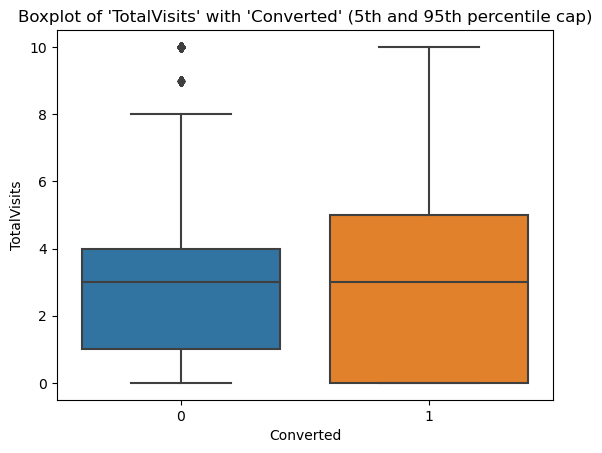

In [46]:
# Calculate the 5th and 95th percentiles for TotalVisits
percentiles = df['TotalVisits'].quantile([0.05, 0.95]).values

# Cap outliers at the 5th and 95th percentiles
df['TotalVisits'] = df['TotalVisits'].clip(percentiles[0], percentiles[1])

# Plotting the boxplot
sns.boxplot(x="Converted", y="TotalVisits", data=df)

# Adding title and labels
plt.title("Boxplot of 'TotalVisits' with 'Converted' (5th and 95th percentile cap)")
plt.xlabel("Converted")
plt.ylabel("TotalVisits")

# Display the plot
plt.show()

In this analysis, we observe that both the non-conversion and conversion features have identical medians. Consequently, it is challenging to determine which factor more significantly affects the target variable.

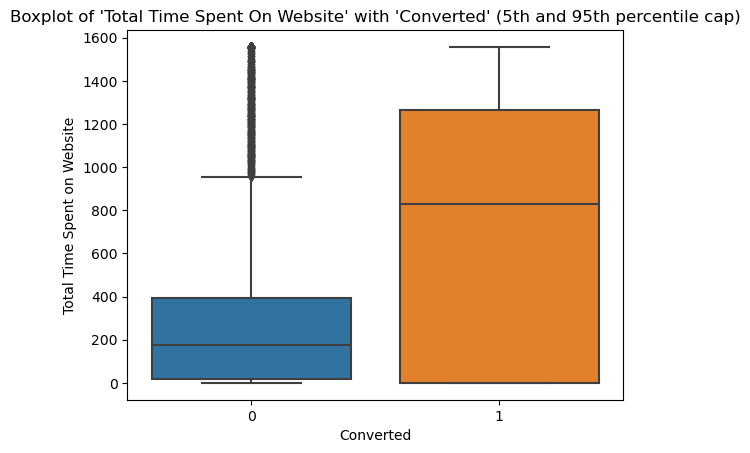

In [47]:
# Calculate the 5th and 95th percentiles for TotalVisits
percentiles = df['Total Time Spent on Website'].quantile([0.05, 0.95]).values

# Cap outliers at the 5th and 95th percentiles
df['Total Time Spent on Website'] = df['Total Time Spent on Website'].clip(percentiles[0], percentiles[1])

# Plotting the boxplot
sns.boxplot(x="Converted", y="Total Time Spent on Website", data=df)

# Adding title and labels
plt.title("Boxplot of 'Total Time Spent On Website' with 'Converted' (5th and 95th percentile cap)")
plt.xlabel("Converted")
plt.ylabel("Total Time Spent on Website")

# Display the plot
plt.show()


The graph reveals a notable correlation between the conversion rate and the "Total time spent on Website" column. Higher time spent on the website corresponds to a heightened likelihood of course enrollment, indicating that individuals who invest more time on the website are more inclined to enroll in the course.



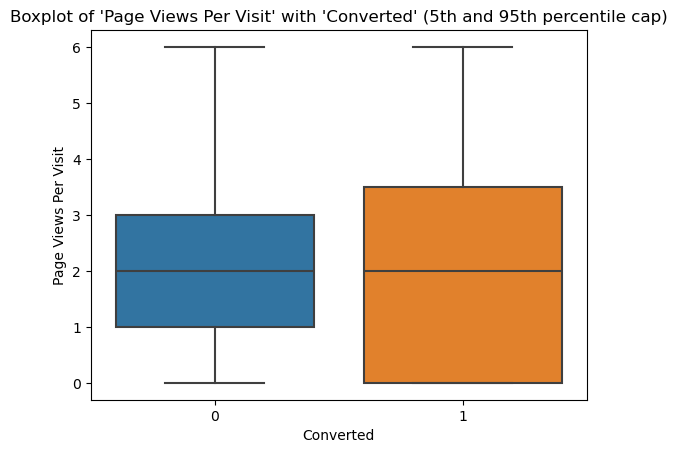

In [48]:
# Calculate the 5th and 95th percentiles for TotalVisits
percentiles = df['Page Views Per Visit'].quantile([0.05, 0.95]).values

# Cap outliers at the 5th and 95th percentiles
df['Page Views Per Visit'] = df['Page Views Per Visit'].clip(percentiles[0], percentiles[1])

# Plotting the boxplot
sns.boxplot(x="Converted", y="Page Views Per Visit", data=df)

# Adding title and labels
plt.title("Boxplot of 'Page Views Per Visit' with 'Converted' (5th and 95th percentile cap)")
plt.xlabel("Converted")
plt.ylabel("Page Views Per Visit")

# Display the plot
plt.show()


In this observation, we note that the medians for both conversion and non-conversion instances remain consistent concerning the "Page Views per Visit" column. Consequently, drawing definitive conclusions regarding the influence of this column on the target variable proves challenging.

## Data Preparation for Logistic Regression

In [49]:
# let's see the data after Data Cleaning and EDA analysis
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [50]:
# shape of the data frame
df.shape

(9074, 14)

After cleaning the data , the number of Rows is 9074 and the number of the column is 14

#### Converted the Yes and No to binary 0,1

In [51]:
# list of Variavbles to map
varlist = ['Do Not Email' ]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [52]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


#### For Catefgorical Variables with multiple levels , create the dummy Variables

In [53]:
# Creating dummy variables for the 'Lead Origin' column
lead_origin_dummies = pd.get_dummies(df['Lead Origin'], prefix='Lead_Origin')
df = pd.concat([df, lead_origin_dummies], axis=1)
df.drop(columns=['Lead Origin'], inplace=True)

# Creating dummy variables for the 'Lead Source' column
lead_source_dummies = pd.get_dummies(df['Lead Source'], prefix='Lead_Source')
df = pd.concat([df, lead_source_dummies], axis=1)
df.drop(columns=['Lead Source'], inplace=True)

# Creating dummy variables for the 'Last Activity' column
last_activity_dummies = pd.get_dummies(df['Last Activity'], prefix='Last_Activity')
df = pd.concat([df, last_activity_dummies], axis=1)
df.drop(columns=['Last Activity'], inplace=True)

# Creating dummy variables for the 'Specialization' column
specialization_dummies = pd.get_dummies(df['Specialization'], prefix='Specialization')
df = pd.concat([df, specialization_dummies], axis=1)
df.drop(columns=['Specialization'], inplace=True)

# Creating dummy variables for the 'What is your current occupation' column
occupation_dummies = pd.get_dummies(df['What is your current occupation'], prefix='Occupation')
df = pd.concat([df, occupation_dummies], axis=1)
df.drop(columns=['What is your current occupation'], inplace=True)

# Creating dummy variables for the 'Tags' column
tags_dummies = pd.get_dummies(df['Tags'], prefix='Tags')
df = pd.concat([df, tags_dummies], axis=1)
df.drop(columns=['Tags'], inplace=True)

# Creating dummy variables for the 'Lead Quality' column
lead_quality_dummies = pd.get_dummies(df['Lead Quality'], prefix='Lead_Quality')
df = pd.concat([df, lead_quality_dummies], axis=1)
df.drop(columns=['Lead Quality'], inplace=True)

# Creating dummy variables for the 'City' column
city_dummies = pd.get_dummies(df['City'], prefix='City')
df = pd.concat([df, city_dummies], axis=1)
df.drop(columns=['City'], inplace=True)

# Creating dummy variables for the 'Last Notable Activity' column
last_notable_activity_dummies = pd.get_dummies(df['Last Notable Activity'], prefix='Last_Notable_Activity')
df = pd.concat([df, last_notable_activity_dummies], axis=1)
df.drop(columns=['Last Notable Activity'], inplace=True)

In [54]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,F

In [55]:
# Fetch columns with object data type
object_columns = df.select_dtypes(include='bool').columns
df[object_columns] = df[object_columns].astype('int')

In [56]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [57]:
#### Lets find the oorelation
# Calculate correlations
correlation_matrix = df.corr()
correlation_matrix

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
Do Not Email,1.000000,-0.140786,0.001856,-0.046415,0.022891,-0.083921,0.099661,-0.031468,-0.016857,-0.006147,0.112262,-0.017137,-0.071484,-0.004346,-0.003073,-0.051070,0.035510,-0.003073,0.050729,-0.035958,-0.010042,-0.004346,-0.003073,0.002835,-0.007529,-0.003073,0.010547,-0.003073,-0.003073,0.035869,-0.006872,-0.063193,0.620041,-0.043705,0.050729,-0.220691,-0.004346,-0.018751,-0.007586,-0.055115,0.083819,-0.003073,-0.019915,0.007831,0.261142,-0.007529,-0.003073,-0.020451,0.005017,0.012947,...,-0.004781,-0.017696,0.010547,-0.011474,0.010547,-0.026938,-0.005323,-0.031691,0.006591,0.141997,0.035869,-0.018987,-0.004346,0.008374,-0.004346,-0.007529,-0.026252,-0.010651,0.049168,0.062603,0.002690,0.028181,0.069996,-0.055805,-0.047507,-0.055689,0.045019,0.097930,-0.029770,0.012954,-0.004146,0.039438,-0.005637,0.046183,-0.003073,0.278748,-0.037815,0.050729,-0.189628,-0.003073,-0.003073,-0.011505,0.122812,-0.012911,0.050922,-0.003073,-0.029608,-0.010516,0.241202,-0.003073
Converted,-0.140786,1.000000,0.050742,0.362824,0.000329,-0.111336,-0.037481,0.300775,-0.009328,0.0160

In [58]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with your data
# For example:
# df = pd.read_csv('your_data.csv')

# Set a threshold for correlation
threshold = 0.8

# Calculate correlations
correlation_matrix = df.corr()

# Find column pairs with correlation above the threshold
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("Column pairs with correlation above the threshold:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")


Column pairs with correlation above the threshold:
Lead_Origin_API - Lead_Origin_Landing Page Submission : -0.8713124305711996
Lead_Origin_Lead Add Form - Lead_Source_Reference : 0.8661912666504402
Lead_Origin_Lead Import - Lead_Source_Facebook : 0.983684365907892
Last_Activity_Email Link Clicked - Last_Notable_Activity_Email Link Clicked : 0.8006856010417477
Last_Activity_Email Marked Spam - Last_Notable_Activity_Email Marked Spam : 1.0
Last_Activity_Email Opened - Last_Notable_Activity_Email Opened : 0.8616355139692862
Last_Activity_Resubscribed to emails - Last_Notable_Activity_Resubscribed to emails : 1.0
Last_Activity_SMS Sent - Last_Notable_Activity_SMS Sent : 0.8531015185251231
Last_Activity_Unsubscribed - Last_Notable_Activity_Unsubscribed : 0.8726564240440919
Occupation_Unemployed - Occupation_Working Professional : -0.8478912964471341


In [59]:
# Columns to drop
columns_to_drop = elected_columns = [
    "Lead_Origin_API",
    "Lead_Source_Reference",
    "Lead_Source_Facebook",
   "Last_Notable_Activity_Email Link Clicked",
    "Last_Notable_Activity_Email Opened",
    "Last_Notable_Activity_SMS Sent",
    "Last_Notable_Activity_Unsubscribed",
    "Occupation_Unemployed"
]
# Drop highly correlated columns'Last_Notable_Activity_UnsubscribedLast_Activity_Email Received'
df.drop(columns=columns_to_drop, inplace=True)


We remove the columns which have high correlated value. 

#### Split the data set into Train and Test

In [60]:
# import the train test split model from the data set
from sklearn.model_selection import train_test_split

In [61]:
# Putting features variable to x
X = df.drop(['Converted'], axis =1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_Unreachable,Last_Notable_Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [62]:
# create the Y data set with the column Converted
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int32

In [63]:
# checking the converted Rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

37.85541106458012

The Rate of Converstion is 37.855

In [64]:
# Spliting the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size =0.3, random_state =100)

### Feature Scaling

In [65]:
# import the StandardScaler
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_Unreachable,Last_Notable_Activity_View in browser link Clicked
3009,0,-0.432779,-0.150296,-0.155018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.543632,-0.155018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.904666,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4750,0,-0.432779,1.717578,-0.155018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7987,0,0.643547,2.053909,0.122613,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,

## Model Building

#### Running the First Model

In [67]:
import statsmodels.api as sm

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize RFE with logistic regression estimator and number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE to the training data
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [69]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False])

In [70]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 71),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 57),
 ('Lead_Origin_Landing Page Submission', False, 16),
 ('Lead_Origin_Lead Add Form', False, 5),
 ('Lead_Origin_Lead Import', False, 19),
 ('Lead_Source_Click2call', False, 52),
 ('Lead_Source_Direct Traffic', False, 56),
 ('Lead_Source_Google', False, 64),
 ('Lead_Source_Live Chat', False, 68),
 ('Lead_Source_NC_EDM', False, 27),
 ('Lead_Source_Olark Chat', False, 6),
 ('Lead_Source_Organic Search', False, 65),
 ('Lead_Source_Pay per Click Ads', False, 101),
 ('Lead_Source_Press_Release', False, 79),
 ('Lead_Source_Referral Sites', False, 44),
 ('Lead_Source_Social Media', False, 67),
 ('Lead_Source_WeLearn', False, 102),
 ('Lead_Source_Welingak Website', True, 1),
 ('Lead_Source_bing', False, 47),
 ('Lead_Source_blog', False, 55),
 ('Lead_Source_google', False, 42),
 ('Lead_Source_testone', False, 100),
 ('Lead_Source_welearnblog_Home', False, 58),

In [71]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Lead_Source_Welingak Website', 'Last_Activity_SMS Sent',
       'Occupation_Working Professional', 'Tags_Already a student',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Lead_Quality_Not Sure', 'Lead_Quality_Worst',
       'Last_Notable_Activity_Modified'],
      dtype='object')

In [72]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Add Form', 'Lead_Origin_Lead Import',
       'Lead_Source_Click2call', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google',
       ...
       'Last_Notable_Activity_Email Bounced',
       'Last_Notable_Activity_Email Marked Spam',
       'Last_Notable_Activity_Email Received',
       'Last_Notable_Activity_Form Submitted on Website',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Page Visited on Website',
       'Last_Notable_Activity_Resubscribed to emails',
       'Last_Notable_Activity_Unreachable',
       'Last_Notable_Activity_View in browser link Clicked'],
      dtype='object', length=101)

In [73]:
# Building Model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1564.1
Date:                Sat, 04 May 2024   Deviance:                       3128.2
Time:                        13:08:46   Pearson chi2:                 2.54e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5685
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0495      0.227     -4.631      0.000      -1.494      -0.605
Lead_Source_Welingak Website                 4.1132      0.736      5.591      0.000       2.671       5.555
Last_Activity_SMS Sent                       2.0056      0.102     19.736      0.000       1.806       2.205
Occupation_Working Professional              1.2813      0.285      4.492      0.000       0.722       1.840
Tags_Already a student                      -1.0726      0.787     -1.363      0.173      -2.615       0.470
Tags_Busy                                    3.3276      0.328     10.131      0.000       2.684       3.971
Tags_Closed by Horizzon                      8.4165      0.774     10.876      0.000       6.900       9.933
Tags_Lost to EINS                            9.2373      0.766     12.053      0.000       7.735      10.739
Tags_Ringing                                -2.1074      0.337     -6.244      0.000      -2.769      -1.446
Tags_Will revert after reading the email     3.4491      0.237     14.525      0.000       2.984       3.914
Tags_invalid number                        -22.5905   1.37e+04     -0.002      0.999   -2.68e+04    2.68e+04
Tags_number not provided                   -23.3315   2.33e+04     -0.001      0.999   -4.57e+04    4.56e+04
Tags_switched off                           -2.7394      0.585     -4.682      0.000      -3.886      -1.593
Lead_Quality_Not Sure                       -3.4305      0.132    -25.909      0.000      -3.690      -3.171
Lead_Quality_Worst                          -3.7403      0.845     -4.428      0.000      -5.396      -2.085
Last_Notable_Activity_Modified              -1.7379      0.107    -16.266      0.000      -1.947      -1.529
============================================================================================================
"""

p-value of variable "Tags_invalid number" given is high, so we can drop it.

In [74]:
#dropping column with high p-value

col = col.drop('Tags_invalid number',1)

In [75]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1570.8
Date:                Sat, 04 May 2024   Deviance:                       3141.6
Time:                        13:08:47   Pearson chi2:                 2.51e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5676
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2553      0.226     -5.545      0.000      -1.699      -0.812
Lead_Source_Welingak Website                 4.1108      0.735      5.592      0.000       2.670       5.552
Last_Activity_SMS Sent                       1.9778      0.101     19.593      0.000       1.780       2.176
Occupation_Working Professional              1.3191      0.288      4.578      0.000       0.754       1.884
Tags_Already a student                      -0.8619      0.786     -1.096      0.273      -2.403       0.680
Tags_Busy                                    3.5419      0.327     10.836      0.000       2.901       4.183
Tags_Closed by Horizzon                      8.6024      0.774     11.113      0.000       7.085      10.120
Tags_Lost to EINS                            9.4318      0.767     12.293      0.000       7.928      10.936
Tags_Ringing                                -1.8810      0.335     -5.613      0.000      -2.538      -1.224
Tags_Will revert after reading the email     3.6510      0.237     15.389      0.000       3.186       4.116
Tags_number not provided                   -22.1035   1.41e+04     -0.002      0.999   -2.77e+04    2.77e+04
Tags_switched off                           -2.5080      0.583     -4.299      0.000      -3.652      -1.364
Lead_Quality_Not Sure                       -3.4215      0.132    -25.922      0.000      -3.680      -3.163
Lead_Quality_Worst                          -3.8015      0.836     -4.547      0.000      -5.440      -2.163
Last_Notable_Activity_Modified              -1.7228      0.107    -16.169      0.000      -1.932      -1.514
============================================================================================================
"""

p-value of variable "Tags_number not provided", so we can drop it.

In [76]:
#dropping column with high p-value

col = col.drop('Tags_number not provided',1)

In [77]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1575.0
Date:                Sat, 04 May 2024   Deviance:                       3150.0
Time:                        13:08:47   Pearson chi2:                 2.49e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5670
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3910      0.225     -6.170      0.000      -1.833      -0.949
Lead_Source_Welingak Website                 4.1089      0.735      5.591      0.000       2.669       5.549
Last_Activity_SMS Sent                       1.9668      0.101     19.542      0.000       1.769       2.164
Occupation_Working Professional              1.3459      0.290      4.644      0.000       0.778       1.914
Tags_Already a student                      -0.7446      0.787     -0.946      0.344      -2.288       0.799
Tags_Busy                                    3.6721      0.327     11.242      0.000       3.032       4.312
Tags_Closed by Horizzon                      8.7167      0.774     11.256      0.000       7.199      10.234
Tags_Lost to EINS                            9.5394      0.767     12.431      0.000       8.035      11.043
Tags_Ringing                                -1.7393      0.334     -5.210      0.000      -2.394      -1.085
Tags_Will revert after reading the email     3.7760      0.238     15.883      0.000       3.310       4.242
Tags_switched off                           -2.3629      0.582     -4.057      0.000      -3.505      -1.221
Lead_Quality_Not Sure                       -3.4095      0.132    -25.889      0.000      -3.668      -3.151
Lead_Quality_Worst                          -3.7451      0.842     -4.448      0.000      -5.395      -2.095
Last_Notable_Activity_Modified              -1.7107      0.106    -16.088      0.000      -1.919      -1.502
============================================================================================================
"""

p-value of variable "Tags_Already a student", so we can drop it.

In [78]:
#dropping column with high p-value

col = col.drop('Tags_Already a student',1)

In [79]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1575.5
Date:                Sat, 04 May 2024   Deviance:                       3151.0
Time:                        13:08:48   Pearson chi2:                 2.51e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5669
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4550      0.218     -6.678      0.000      -1.882      -1.028
Lead_Source_Welingak Website                 4.1094      0.735      5.592      0.000       2.669       5.550
Last_Activity_SMS Sent                       1.9713      0.101     19.596      0.000       1.774       2.168
Occupation_Working Professional              1.3412      0.289      4.635      0.000       0.774       1.908
Tags_Busy                                    3.7356      0.322     11.612      0.000       3.105       4.366
Tags_Closed by Horizzon                      8.7849      0.772     11.380      0.000       7.272      10.298
Tags_Lost to EINS                            9.6298      0.765     12.589      0.000       8.131      11.129
Tags_Ringing                                -1.6785      0.329     -5.097      0.000      -2.324      -1.033
Tags_Will revert after reading the email     3.8410      0.230     16.664      0.000       3.389       4.293
Tags_switched off                           -2.3029      0.580     -3.971      0.000      -3.440      -1.166
Lead_Quality_Not Sure                       -3.4123      0.132    -25.919      0.000      -3.670      -3.154
Lead_Quality_Worst                          -3.9134      0.811     -4.824      0.000      -5.503      -2.323
Last_Notable_Activity_Modified              -1.7106      0.106    -16.084      0.000      -1.919      -1.502
============================================================================================================
"""

Now we see that all the p-values are less. Let's check Variance Inflation Factor to verify if there any co-relation between any columns

In [80]:
# import variance inflation factor from stats model 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# create a dataframe where we see the all features and their vif
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead_Quality_Not Sure,3.02
7,Tags_Will revert after reading the email,2.80
11,Last_Notable_Activity_Modified,1.63
1,Last_Activity_SMS Sent,1.60
6,Tags_Ringing,1.52
2,Occupation_Working Professional,1.23
3,Tags_Busy,1.11
10,Lead_Quality_Worst,1.10
4,Tags_Closed by Horizzon,1.09
8,Tags_switched off,1.09


Here we see the vif values are in order

let's check the probabilities , leadScore and Prediction on the TrainData

In [82]:
# Let's check the predicted value on the train dataset
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.263813
1012    0.578083
9226    0.001860
4750    0.720123
7987    0.993459
1281    0.987350
2880    0.263813
4971    0.698397
7536    0.915756
1248    0.001860
dtype: float64

In [83]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2638126 , 0.57808313, 0.00186035, 0.72012266, 0.99345936,
       0.9873498 , 0.2638126 , 0.6983969 , 0.91575624, 0.00186035])

In [84]:
# Let's compare the original and predicted( on train dataset) target value
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.263813,3009
1,0,0.578083,1012
2,0,0.001860,9226
3,1,0.720123,4750
4,1,0.993459,7987


In [85]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.263813,3009,0
1,0,0.578083,1012,1
2,0,0.001860,9226,0
3,1,0.720123,4750,1
4,1,0.993459,7987,1
5,1,0.987350,1281,1
6,0,0.263813,2880,0
7,1,0.698397,4971,1
8,1,0.915756,7536,1
9,0,0.001860,1248,0


In [86]:
# check the confusion matrix
from sklearn import metrics # import the metrics from sklearn
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3745  160]
 [ 347 2099]]


In [87]:
# Let's check the overall accuracy.
print('Accuracy:',(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)))

Accuracy: 0.9201700519603212


In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity',(TP / float(TP+FN)))

Sensitivity 0.8581357318070318


In [90]:
# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))

Specificity: 0.9590268886043534


In [91]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print('False positive rate:',(FP/ float(TN+FP)))

False positive rate: 0.040973111395646605


In [92]:
# positive predictive value 
print('Positive predictive rate:', (TP / float(TP+FP)))

Positive predictive rate: 0.9291722000885347


In [93]:
# Negative predictive value
print('Negetive predictive rate:', (TN / float(TN+ FN)))

Negetive predictive rate: 0.9152003910068426


### Plot the ROC curve

In [94]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

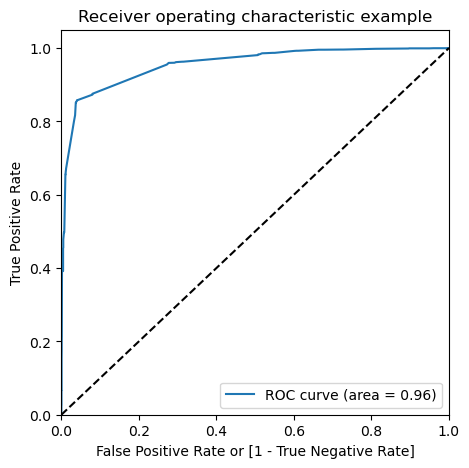

In [96]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

An ROC curve value of 0.96 suggests that the model is performing well. In ROC analysis, values closer to 1 indicate better performance. Therefore, with a score of 0.96, we can conclude that the model is indeed good.

### Finding Optimal Cutoff Point

#### In the previous section, we selected a cutoff value of 0.5 arbitrarily. Now, we aim to identify the optimal cutoff value. Let's delve into this aspect.

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.263813,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.578083,1012,1,1,1,1,1,1,1,0,0,0,0
2,0,0.001860,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.720123,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.993459,7987,1,1,1,1,1,1,1,1,1,1,1


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.792316  0.962796  0.685531
0.2   0.2  0.803810  0.961161  0.705250
0.3   0.3  0.901905  0.872854  0.920102
0.4   0.4  0.919540  0.858136  0.958003
0.5   0.5  0.920170  0.858136  0.959027
0.6   0.6  0.920013  0.855683  0.960307
0.7   0.7  0.902850  0.799264  0.967734
0.8   0.8  0.865533  0.670074  0.987964
0.9   0.9  0.862699  0.661079  0.988988


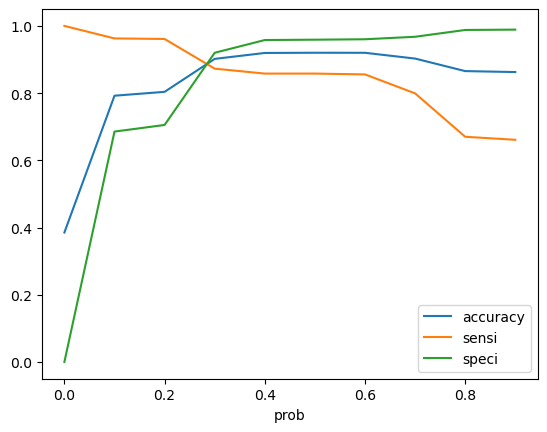

In [99]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.263813,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.578083,1012,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.001860,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.720123,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.993459,7987,1,1,1,1,1,1,1,1,1,1,1,1
5,1,0.987350,1281,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.263813,2880,0,1,1,1,0,0,0,0,0,0,0,0
7,1,0.698397,4971,1,1,1,1,1,1,1,1,0,0,0,1
8,1,0.915756,7536,1,1,1,1,1,1,1,1,1,1,1,1
9,0,0.001860,1248,0,1,0,0,0,0,0,0,0,0,0,0


In [101]:
# Let's check the overall accuracy.
print("Accuracy:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))


Accuracy: 0.9019052117776728


In [102]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3593,  312],
       [ 311, 2135]], dtype=int64)

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",(TP / float(TP+FN)))

Sensitivity: 0.8728536385936222


In [105]:
# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))

Specificity: 0.9201024327784891


In [106]:
# Calculate false postive rate - predicting churn when customer does not have churned
print('False positive rate:',(FP/ float(TN+FP)))

False positive rate: 0.07989756722151088


In [107]:
# Positive predictive value 
print('Positive predictive rate:',(TP / float(TP+FP)))

Positive predictive rate: 0.8724969350224765


In [108]:
# Negative predictive value
print('Negetive predictive rate:', (TN / float(TN+ FN)))

Negetive predictive rate: 0.9203381147540983


### Precision and Recall

In [109]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3745,  160],
       [ 347, 2099]], dtype=int64)

In [110]:
##### Precision
TP / TP + FP

print('Pricision:',(confusion[1,1]/(confusion[0,1]+confusion[1,1])))

Pricision: 0.9291722000885347


In [111]:
# Recall
print('Recall:',(confusion[1,1]/(confusion[1,0]+confusion[1,1])))

Recall: 0.8581357318070318


#### Using sklearn utilities for the same

In [112]:
from sklearn.metrics import precision_score, recall_score # Import the precision_score and recall_score from sklearn

In [113]:
print('Precision_score',(precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)))

Precision_score 0.9291722000885347


In [114]:
print('recall_score',(recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)))

recall_score 0.8581357318070318


### Precision and recall tradeoff

In [115]:
from sklearn.metrics import precision_recall_curve # Import the precision curve from the sk learn

In [116]:
y_train_pred_final.Converted, y_train_pred_final.Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

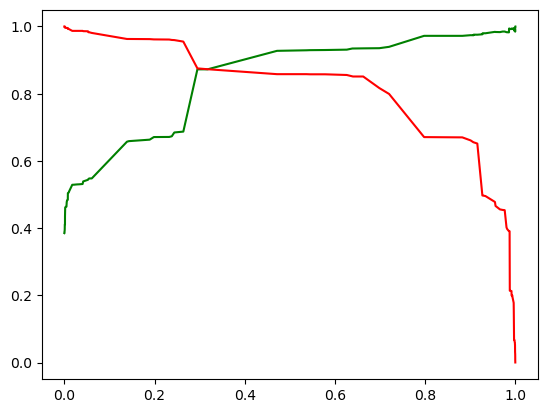

In [117]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [118]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_Unreachable,Last_Notable_Activity_View in browser link Clicked
3271,0,4.0,157,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1490,0,5.0,1513,5.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7936,0,2.0,74,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4216,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3830,0,8.0,164,6.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [119]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_Unreachable,Last_Notable_Activity_View in browser link Clicked
3271,0,0.304501,-0.596974,0.998931,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1490,0,0.666261,1.983614,1.564920,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7936,0,-0.419021,-0.754931,-0.133048,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4216,0,-1.142542,-0.895759,-1.265027,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3830,0,1.751544,-0.583653,2.130909,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0

In [120]:
X_test = X_test[col]
X_test.head()

,Lead_Source_Welingak Website,Last_Activity_SMS Sent,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead_Quality_Not Sure,Lead_Quality_Worst,Last_Notable_Activity_Modified
3271,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,1,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,0,0,0,1,0,0,0,0,0,0,1
3830,0,0,0,0,0,0,0,1,0,1,0,0


In [121]:
X_test_sm = sm.add_constant(X_test)

Make Prediction on the test set

In [122]:
y_test_pred = res.predict(X_test_sm)

In [123]:
y_test_pred[:10]

3271    0.263813
1490    0.976505
7936    0.263813
4216    0.996386
3830    0.263813
1800    0.976505
6507    0.010206
4821    0.000769
4223    0.987350
4714    0.317440
dtype: float64

In [124]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [125]:
# Let's see the head
y_pred_1.head()

,0
3271,0.263813
1490,0.976505
7936,0.263813
4216,0.996386
3830,0.263813


In [126]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [127]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [128]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [129]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [130]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.263813
1,1,1490,0.976505
2,0,7936,0.263813
3,1,4216,0.996386
4,0,3830,0.263813


In [131]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [132]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [133]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3271,0,0.263813,26
1,1490,1,0.976505,98
2,7936,0,0.263813,26
3,4216,1,0.996386,100
4,3830,0,0.263813,26


In [134]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3271,0,0.263813,26,0
1,1490,1,0.976505,98,1
2,7936,0,0.263813,26,0
3,4216,1,0.996386,100,1
4,3830,0,0.263813,26,0


In [135]:
# Let's check the overall accuracy.
print('Accuracy:',(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)))

Accuracy: 0.8960705104663974


In [136]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1597,  137],
       [ 146,  843]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:',(TP / float(TP+FN)))

Sensitivity: 0.8523761375126391


In [139]:
# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))

Specificity: 0.9209919261822376


In [140]:
print('Precision_Score:',(precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)))

Precision_Score: 0.860204081632653


In [141]:
print('Recall_score',(recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)))

Recall_score 0.8523761375126391


In [142]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Extract feature importance (coefficients)
feature_importance = abs(model.coef_[0])

# Identify top three features
top_three_indices = feature_importance.argsort()[-3:][::-1]
top_three_features = X.columns[top_three_indices]

print("Top three variables contributing most towards the probability of conversion:")
for feature in top_three_features:
    print(feature)


Top three variables contributing most towards the probability of conversion:
Tags_Lost to EINS
Tags_Ringing
Tags_Closed by Horizzon


#### Observation:

After running the model on the test data, the following figures were obtained:

- Accuracy: 89.60%
- Sensitivity: 85.23%
- Specificity: 92.09%

Final Observation:

Let's compare the values obtained for the train and test datasets:

Train Data:

- Accuracy: 90.19%
- Sensitivity: 87.28%
- Specificity: 92.01%

Test Data:

- Accuracy: 89.60%
- Sensitivity: 85.23%
- Specificity: 92.09%

The model appears to predict the conversion rate very well. We can confidently assure the CEO that this model will aid in making informed decisions.